# Deep Learning Project - Part 1: Data Analysis

## Load libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from scipy.stats import ks_2samp
from sklearn.cluster import KMeans

## Load data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/compressed_dataset.csv.zip',compression='zip',index_col=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20615370 entries, 0 to 20615369
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   timestamp    int64  
 2   customer_id  float64
 3   event_id     float64
 4   viewer_id    float64
 5   city_id      float64
 6   country_id   float64
 7   viewer_type  object 
 8   qoe          float64
 9   engagement   float64
 10  buffer_ms    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 1.7+ GB


## Extract features from timestamp / Encode viewer_type

In [ ]:
data['viewer_type'] = LabelEncoder().fit_transform(data['viewer_type'])

data['date/time'] = pd.to_datetime(data['timestamp'],unit = 'ms')
data['date'] = data['date/time'].dt.date
data['time'] = pd.Series(data['date/time']).dt.round("T").dt.time
data['day_of_week'] = data['date/time'].dt.weekday
data.head()

,Unnamed: 0,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date/time,date,time,day_of_week
0,0,1632762065906,5.0,107.0,11661.0,2.0,3.0,1,0.999976,0.0,785,2021-09-27 17:01:05.906,2021-09-27,17:01:00,0
1,19,1632762104254,5.0,107.0,12810.0,2.0,3.0,0,0.281964,0.9,3895,2021-09-27 17:01:44.254,2021-09-27,17:02:00,0
2,40,1632762108299,5.0,107.0,15129.0,19.0,3.0,0,1.000000,0.9,0,2021-09-27 17:01:48.299,2021-09-27,17:02:00,0
3,55,1632762112510,5.0,107.0,5860.0,217.0,3.0,0,0.999988,0.0,466,2021-09-27 17:01:52.510,2021-09-27,17:02:00,0
4,78,1632762129231,5.0,107.0,4483.0,2.0,3.0,1,1.000000,0.0,0,2021-09-27 17:02:09.231,2021-09-27,17:02:00,0


## Cluster similar distributions

### Engagement - Time (Based on customer_id)

In [ ]:
df = data[['customer_id','time','engagement']].groupby(['customer_id','time']).mean().reset_index()
customers = df.customer_id.drop_duplicates().tolist()

n = len(customers)

arr = np.ones((n,n))

for i in tqdm(range(n),desc='Calculating distribution similarity...'):
  en1 = df.loc[df.customer_id == customers[i],'engagement']
  for j in range(i+1,n):
    en2 = df.loc[df.customer_id == customers[j],'engagement']
    value = ks_2samp(en1,en2)
    arr[i][j] = value.statistic
    arr[j][i] = value.statistic

kmeans_en_custid = KMeans(n_clusters = 5).fit_predict(arr)

Calculating distribution similarity...: 100%|██████████| 33/33 [00:04<00:00,  6.67it/s]


### Engagement - Time (Based on country_id)

In [ ]:
df = data[['country_id','time','engagement']].groupby(['country_id','time']).mean().reset_index()
countries = df.country_id.drop_duplicates().tolist()

n = len(countries)

arr = np.ones((n,n))

for i in tqdm(range(n),desc='Calculating distribution similarity...'):
  en1 = df.loc[df.country_id == countries[i],'engagement']
  for j in range(i+1,n):
    en2 = df.loc[df.country_id == countries[j],'engagement']
    value = ks_2samp(en1,en2)
    arr[i][j] = value.statistic
    arr[j][i] = value.statistic

kmeans_en_country_id = KMeans(n_clusters = 5).fit_predict(arr)

Calculating distribution similarity...: 100%|██████████| 124/124 [01:00<00:00,  2.06it/s]


### Engagement - Time(Based on city_id)

In [ ]:

df = data[['city_id','time','engagement']].groupby('city_id')

keys = list(df.groups.keys())

n = len(keys)

arr = np.ones((n,n))

for i in tqdm(range(n),desc='Calculating distribution similarity...'):
  en1 = df.get_group(keys[i]).groupby('time').agg({'engagement':'mean'}).engagement
  for j in range(i+1,n):
    en2 = df.get_group(keys[j]).groupby('time').agg({'engagement':'mean'}).engagement
    value = ks_2samp(en1,en2)
    arr[i][j] = value.statistic
    arr[j][i] = value.statistic

kmeans_en_city_id = KMeans(n_clusters = 5).fit_predict(arr)

Calculating distribution similarity...:   0%|          | 1/8243 [01:22<188:28:05, 82.32s/it]

## QoE - Time (Based on customer_id)

In [ ]:
df = data[['customer_id','time','qoe']].groupby(['customer_id','time']).mean().reset_index()
customers = df.customer_id.drop_duplicates().tolist()

n = len(customers)

arr = np.ones((n,n))

for i in tqdm(range(n),desc='Calculating distribution similarity...'):
  qoe1 = df.loc[df.customer_id == customers[i],'qoe']
  for j in range(i+1,n):
    qoe2 = df.loc[df.customer_id == customers[j],'qoe']
    value = ks_2samp(qoe1,qoe2)
    arr[i][j] = value.statistic
    arr[j][i] = value.statistic

kmeans_qoe_custid = KMeans(n_clusters = 5).fit_predict(arr)

Calculating distribution similarity...: 100%|██████████| 33/33 [00:05<00:00,  6.58it/s]


## QoE - Time (Based on country_id)

In [ ]:
df = data[['country_id','time','qoe']].groupby(['country_id','time']).mean().reset_index()
countries = df.country_id.drop_duplicates().tolist()

n = len(countries)

arr = np.ones((n,n))

for i in tqdm(range(n),desc='Calculating distribution similarity...'):
  qoe1 = df.loc[df.country_id == countries[i],'qoe']
  for j in range(i+1,n):
    qoe2 = df.loc[df.country_id == countries[j],'qoe']
    value = ks_2samp(qoe1,qoe2)
    arr[i][j] = value.statistic
    arr[j][i] = value.statistic

kmeans_qoe_country_id = KMeans(n_clusters = 5).fit_predict(arr)

Calculating distribution similarity...: 100%|██████████| 124/124 [00:59<00:00,  2.09it/s]


## QoE - Time (Based on city_id)

In [ ]:
df = data[['city_id','time','qoe']].groupby(['city_id','time']).mean().reset_index()
cities = df.city_id.drop_duplicates().tolist()

n = len(cities)

arr = np.ones((n,n))

for i in tqdm(range(n),desc='Calculating distribution similarity...'):
  qoe1 = df.loc[df.city_id == cities[i],'qoe']
  for j in range(i+1,n):
    qoe2 = df.loc[df.city_id == cities[j],'qoe']
    value = ks_2samp(qoe1,qoe2)
    arr[i][j] = value.statistic
    arr[j][i] = value.statistic

kmeans_qoe_city_id = KMeans(n_clusters = 5).fit_predict(arr)

## Question 1 (Viewers' engagement distribution over time )

### Customer_id

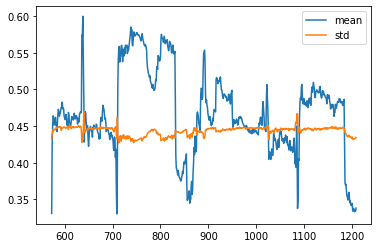

The similar distribution follows the customers with id: [ 1  6  7  9 12 15 22 23 27 31]


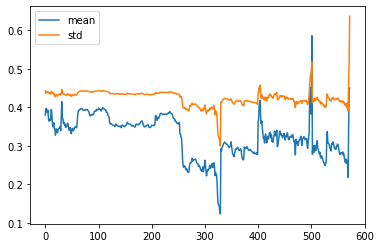

The similar distribution follows the customers with id: [ 0  4 17 18 24]


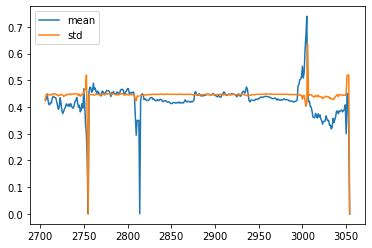

The similar distribution follows the customers with id: [ 5 10 11 16 19 20 26 28 29 30]


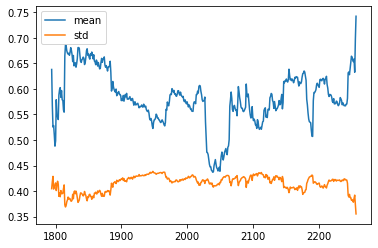

The similar distribution follows the customers with id: [3]


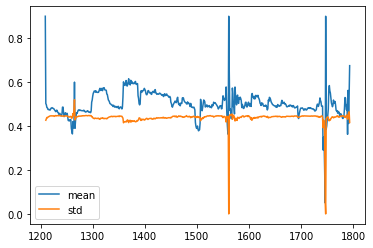

The similar distribution follows the customers with id: [ 2  8 13 14 21 25 32]


In [ ]:
df = data[['customer_id','time','engagement']].groupby(['customer_id','time']).agg({'engagement':['mean','std']}).reset_index()
for i in range(5):
  customer_i = np.where(kmeans_en_custid == i)[0][0]
  plt.plot(df.loc[df.customer_id == customer_i,('engagement','mean')],label='mean')
  plt.plot(df.loc[df.customer_id == customer_i,('engagement','std')],label='std')
  plt.legend()
  plt.show()
  print('The similar distribution follows the customers with id: ' + str(np.where(kmeans_en_custid == i)[0]))

### Country_id

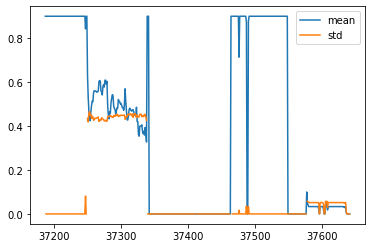

The similar distribution follows the countries with id: [ 53  63  68  69  70  73  74  79  80  82  84  91  93  95  97  99 101 102
 117]


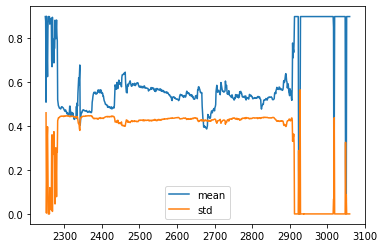

The similar distribution follows the countries with id: [ 2  5  6  7  8  9 10 11 12 13 15 16 18 19 21 25 26 27 28 29 30 32 33 35
 36 40 44 45 50 51 52 54 55 56 57 65 75 87 90]


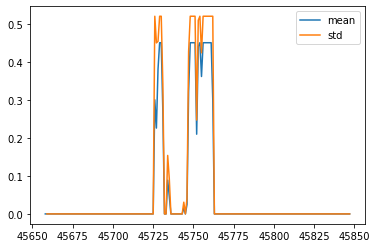

The similar distribution follows the countries with id: [ 83  85  89  94  98 100 103 104 106 107 108 109 111 116 118 119 120 123]


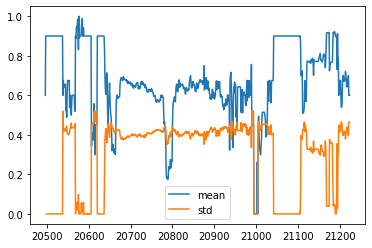

The similar distribution follows the countries with id: [ 23  59  71  77  78  81  86  88 105 110 112 113 114 115 122]


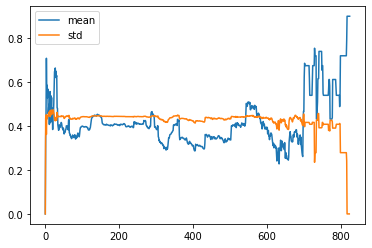

The similar distribution follows the countries with id: [  0   1   3   4  14  17  20  22  24  31  34  37  38  39  41  42  43  46
  47  48  49  58  60  61  62  64  66  67  72  76  92  96 121]


In [ ]:
df = data[['country_id','time','engagement']].groupby(['country_id','time']).agg({'engagement':['mean','std']}).reset_index()
for i in range(5):
  country_i = np.where(kmeans_en_country_id == i)[0][0]
  plt.plot(df.loc[df.country_id == country_i,('engagement','mean')],label='mean')
  plt.plot(df.loc[df.country_id == country_i,('engagement','std')],label='std')
  plt.legend()
  plt.show()
  print('The similar distribution follows the countries with id: ' + str(np.where(kmeans_en_country_id == i)[0]))

### City_id

In [ ]:
df = data[['city_id','time','engagement']].groupby(['city_id','time']).agg({'engagement':['mean','std']}).reset_index()
for i in range(5):
  city_i = np.where(kmeans_en_city_id == i)[0][0]
  plt.plot(df.loc[df.city_id == city_i,('engagement','mean')],label='mean')
  plt.plot(df.loc[df.city_id == city_i,('engagement','std')],label='std')
  plt.legend()
  plt.show()
  print('The similar distribution follows the cities with id: ' + str(np.where(kmeans_en_city_id == i)[0]))

## Question 2 (Viewers' engagement distribution over time)

### Customer_id

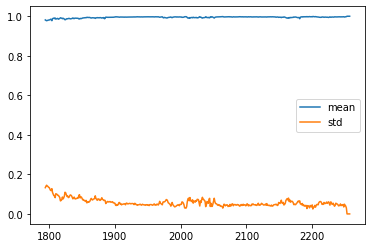

The similar distribution follows the cities with id: [ 3  5  9 11 12 20 23]


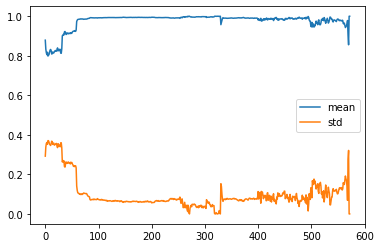

The similar distribution follows the cities with id: [ 0 10 13 15 18 21 22 27 29]


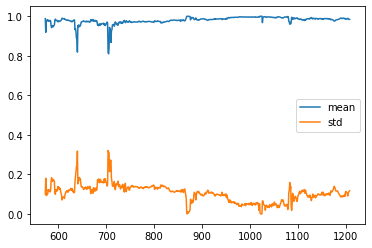

The similar distribution follows the cities with id: [ 1  2  4  7  8 14 17]


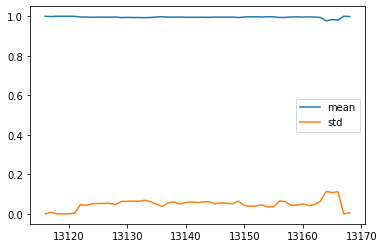

The similar distribution follows the cities with id: [24 30 31 32]


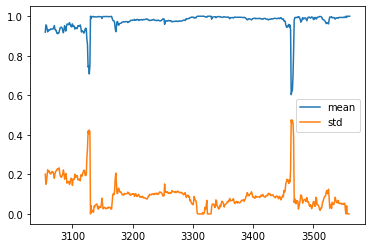

The similar distribution follows the cities with id: [ 6 16 19 25 26 28]


In [ ]:
df = data[['customer_id','time','qoe']].groupby(['customer_id','time']).agg({'qoe':['mean','std']}).reset_index()

for i in range(5):
  customer_i = np.where(kmeans_qoe_custid == i)[0][0]
  plt.plot(df.loc[df.customer_id == customer_i,('qoe','mean')],label='mean')
  plt.plot(df.loc[df.customer_id == customer_i,('qoe','std')],label='std')
  plt.legend()
  plt.show()
  print('The similar distribution follows the cities with id: ' + str(np.where(kmeans_qoe_custid == i)[0]))

### Country_id

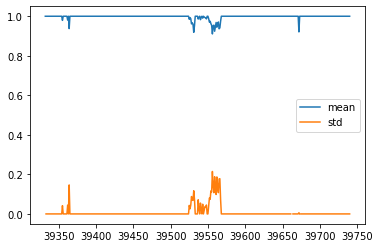

The similar distribution follows the cities with id: [ 59  61  65  69  81  82  84  85  86  94  96  97  98 100 104 105 106 108
 109 110 111 112 114 116 119 121 122 123]


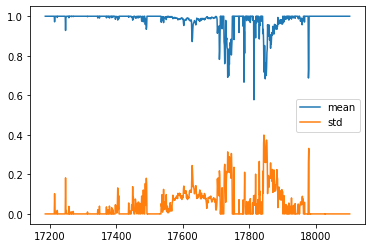

The similar distribution follows the cities with id: [ 19  20  21  22  26  28  29  32  34  35  36  37  39  42  44  45  48  51
  68  71  72  75  79  89  90  91  93  95  99 113 117]


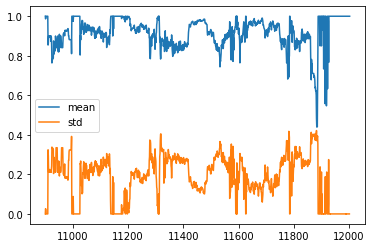

The similar distribution follows the cities with id: [ 12  13  25  30  73  80  88  92 102 103 115 120]


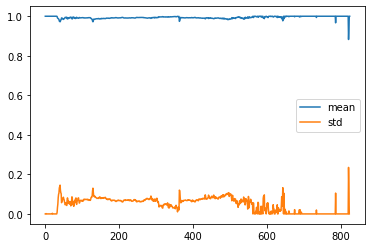

The similar distribution follows the cities with id: [  0   1   2   3   4   5   6   7   8   9  10  11  14  15  16  17  18  23
  24  33  47  52 101]


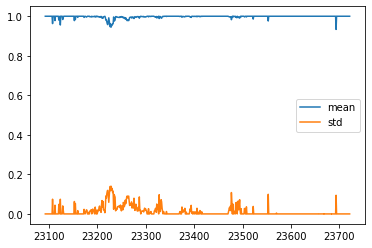

The similar distribution follows the cities with id: [ 27  31  38  40  41  43  46  49  50  53  54  55  56  57  58  60  62  63
  64  66  67  70  74  76  77  78  83  87 107 118]


In [ ]:
df = data[['country_id','time','qoe']].groupby(['country_id','time']).agg({'qoe':['mean','std']}).reset_index()

for i in range(5):
  country_i = np.where(kmeans_qoe_country_id == i)[0][0]
  plt.plot(df.loc[df.country_id == country_i,('qoe','mean')],label='mean')
  plt.plot(df.loc[df.country_id == country_i,('qoe','std')],label='std')
  plt.legend()
  plt.show()
  print('The similar distribution follows the cities with id: ' + str(np.where(kmeans_qoe_country_id == i)[0]))

### City_id

In [ ]:
df = data[['city_id','time','qoe']].groupby(['city_id','time']).agg({'qoe':['mean','std']}).reset_index()

for i in range(5):
  city_i = np.where(kmeans_qoe_city_id == i)[0][0]
  plt.plot(df.loc[df.city_id == city_i,('qoe','mean')],label='mean')
  plt.plot(df.loc[df.city_id == city_i,('qoe','std')],label='std')
  plt.legend()
  plt.show()
  print('The similar distribution follows the cities with id: ' + str(np.where(kmeans_qoe_city_id == i)[0]))

## Question 3 (Viewers' engagement / qoe differences based on viewer_type)

In [ ]:
from scipy.stats import ks_2samp

office = data.loc[data.viewer_type == 0,('engagement','qoe')]
home = data.loc[data.viewer_type == 1,('engagement','qoe')]

print("Kolmogorov–Smirnov test for engagement is " + str(ks_2samp(office['engagement'],home['engagement']).statistic))
print("Kolmogorov–Smirnov test for QoE is " + str(ks_2samp(office['qoe'],home['qoe']).statistic))

del office
del home

Kolmogorov–Smirnov test for engagement is 0.034261164234109076
Kolmogorov–Smirnov test for QoE is 0.005499359059944611


## Question 4 (Viewers' engagement level)

In [ ]:
import numpy as np
from scipy.stats import ks_2samp
cols = ['customer_id','country_id','city_id','engagement','viewer_type']
df = data[cols]
conditions = [
    (df['engagement'] <= 0.25),
    (df['engagement'] > 0.25) & (df['engagement'] <= 0.5),
    (df['engagement'] > 0.5) & (df['engagement'] <= 0.75),
    (df['engagement'] <= 1)
    ]

# create a list of the values we want to assign for each condition
values = ['very low','low','avg','high']

# create a new column and use np.select to assign values to it using our lists as arguments
df['tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,customer_id,country_id,city_id,engagement,viewer_type,tier
0,5.0,3.0,2.0,0.0,1,very low
1,5.0,3.0,2.0,0.9,0,high
2,5.0,3.0,19.0,0.9,0,high
3,5.0,3.0,217.0,0.0,0,very low
4,5.0,3.0,2.0,0.0,1,very low


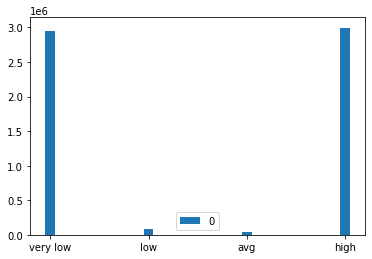

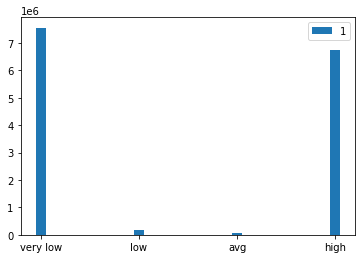

In [ ]:
import matplotlib.pyplot as plt

grouped = df.groupby('viewer_type')
for key, item in grouped:
  x = grouped.get_group(key)['tier'].tolist()
  Y = np.array([x.count('very low'), x.count('low'), x.count('avg'), x.count('high')])
  plt.bar(x = values, height = Y,width = 0.1, label = str(key))
  plt.legend()
  plt.show()

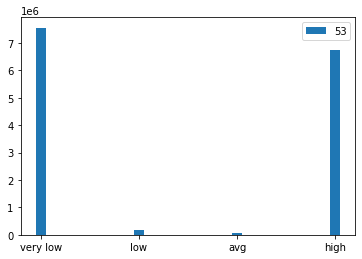

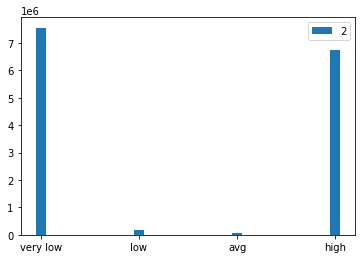

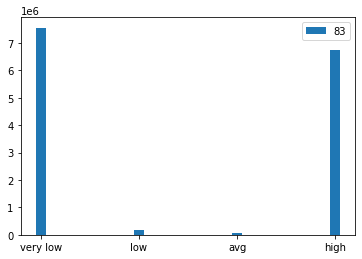

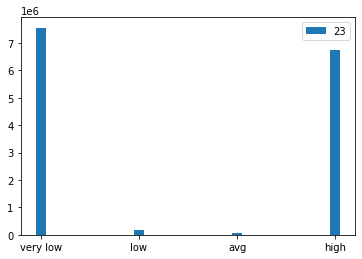

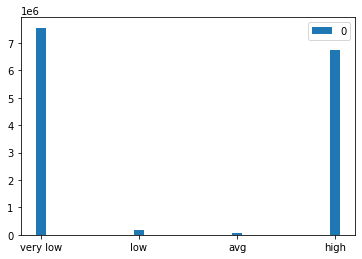

In [ ]:
for i in range(5):
  country_i = np.where(kmeans_en_country_id == i)[0][0]
  df.loc[df.country_id == country_i,'tier'].tolist()
  Y = np.array([x.count('very low'), x.count('low'), x.count('avg'), x.count('high')])
  plt.bar(x = values, height = Y,width = 0.1, label = str(country_i))
  plt.legend()
  plt.show()

In [ ]:
for i in range(5):
  city_i = np.where(kmeans_en_city_id == i)[0][0]
  df.loc[df.country_id == city_i,'tier'].tolist()
  Y = np.array([x.count('very low'), x.count('low'), x.count('avg'), x.count('high')])
  plt.bar(x = values, height = Y,width = 0.1, label = str(city_i))
  plt.legend()
  plt.show()

## Question 5 (Countries / Cities that follow different distributions)

### Country_id

QoE

In [ ]:
for i in range(5):
  country_i = np.where(kmeans_qoe_country_id == i)[0][0]
  print('The similar distribution follows the cities with id: ' + str(np.where(kmeans_qoe_country_id == i)[0]))

The similar distribution follows the cities with id: [ 59  61  65  69  81  82  84  85  86  94  96  97  98 100 104 105 106 108
 109 110 111 112 114 116 119 121 122 123]
The similar distribution follows the cities with id: [ 19  20  21  22  26  28  29  32  34  35  36  37  39  42  44  45  48  51
  68  71  72  75  79  89  90  91  93  95  99 113 117]
The similar distribution follows the cities with id: [ 12  13  25  30  73  80  88  92 102 103 115 120]
The similar distribution follows the cities with id: [  0   1   2   3   4   5   6   7   8   9  10  11  14  15  16  17  18  23
  24  33  47  52 101]
The similar distribution follows the cities with id: [ 27  31  38  40  41  43  46  49  50  53  54  55  56  57  58  60  62  63
  64  66  67  70  74  76  77  78  83  87 107 118]


Engagement

In [ ]:
for i in range(5):
  country_i = np.where(kmeans_en_country_id == i)[0][0]
  print('The similar distribution follows the countries with id: ' + str(np.where(kmeans_en_country_id == i)[0]))

The similar distribution follows the countries with id: [ 53  63  68  69  70  73  74  79  80  82  84  91  93  95  97  99 101 102
 117]
The similar distribution follows the countries with id: [ 2  5  6  7  8  9 10 11 12 13 15 16 18 19 21 25 26 27 28 29 30 32 33 35
 36 40 44 45 50 51 52 54 55 56 57 65 75 87 90]
The similar distribution follows the countries with id: [ 83  85  89  94  98 100 103 104 106 107 108 109 111 116 118 119 120 123]
The similar distribution follows the countries with id: [ 23  59  71  77  78  81  86  88 105 110 112 113 114 115 122]
The similar distribution follows the countries with id: [  0   1   3   4  14  17  20  22  24  31  34  37  38  39  41  42  43  46
  47  48  49  58  60  61  62  64  66  67  72  76  92  96 121]


### City_id

QoE

In [ ]:
for i in range(5):
  city_i = np.where(kmeans_qoe_city_id == i)[0][0]
  print('The similar distribution follows the cities with id: ' + str(np.where(kmeans_qoe_city_id == i)[0]))

Engagement

In [ ]:
for i in range(5):
  city_i = np.where(kmeans_en_city_id == i)[0][0]
  print('The similar distribution follows the cities with id: ' + str(np.where(kmeans_en_city_id == i)[0]))

## Question 6 (Correlation between features)

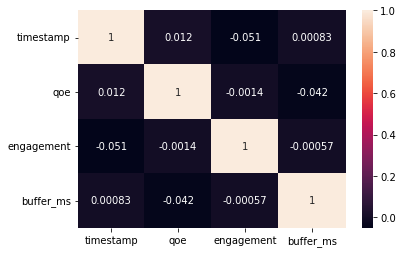

In [ ]:
import seaborn as sns
cols = ['timestamp','qoe','engagement','buffer_ms']
sns.heatmap(data=data[cols].corr(),annot=True)

In [ ]:
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler


cols_categorical = ['viewer_type']
cols_continuous = ['timestamp','qoe','engagement','buffer_ms']
df = data[cols_categorical + cols_continuous]
df['timestamp'] = StandardScaler().fit_transform(df['timestamp'].values.reshape(-1,1))
for cat in cols_categorical:
  a = df[cat].to_numpy()
  print('-'*20)
  for ct in cols_continuous:
    b = df[ct].to_numpy()
    f = pointbiserialr(a,b)
    print('Corr (' + cat +', ' + ct + '): ' + str(f.correlation))
  print('-'*20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


--------------------
Corr (viewer_type, timestamp): 0.1303575141252665
Corr (viewer_type, qoe): -0.010102081104994973
Corr (viewer_type, engagement): -0.030058741502844585
Corr (viewer_type, buffer_ms): -5.833260343785819e-05
--------------------


## Question 7 (Correlation between  engagement and new features)

## Engagement - Number of viewers

In [ ]:
cols = ['event_id','viewer_id','engagement']

def countViewers(X):
  return X.drop_duplicates().count()

number_of_viewers = data[cols].groupby(['event_id']).agg({'viewer_id':countViewers}).reset_index().rename(columns={'viewer_id':'number_of_viewers'})['number_of_viewers']
engagement =  data[cols].groupby(['event_id']).agg({'engagement':['mean']})[('engagement','mean')]

df = pd.DataFrame({'engagement':engagement,'number_of_viewers':number_of_viewers})
print(df.corr())
del number_of_viewers
del engagement

                   engagement  number_of_viewers
engagement           1.000000          -0.012753
number_of_viewers   -0.012753           1.000000


## Engagement - Day of the event

In [ ]:
cols = ['event_id','day_of_week']
data[cols].drop_duplicates().corr(method = 'spearman')

,event_id,day_of_week
event_id,1.000000,0.001554
day_of_week,0.001554,1.000000


## Engagement - Duration of the event

In [ ]:
cols = ['event_id','timestamp','engagement']
def Duration(x):
  l = x.tolist()
  l.sort()
  return l[-1] - l[0]

duration = data[cols].groupby(['event_id']).agg({'timestamp':Duration}).reset_index().rename(columns={'timestamp':'Duration'})['Duration']
engagement =  data[cols].groupby(['event_id']).agg({'engagement':['mean']})[('engagement','mean')]
df = pd.DataFrame({'engagement':engagement,'Duration':duration})
print(df.corr())
del duration
del engagement

            engagement  Duration
engagement    1.000000  0.193541
Duration      0.193541  1.000000


## Engagement - Countries

In [ ]:
cols = ['country_id','engagement']
data[cols].groupby('country_id').agg({'engagement':['mean']}).reset_index().sort_values(('engagement','mean'))

,country_id,engagement
,,mean
123,123.0,0.000000
94,94.0,0.000000
100,100.0,0.000000
120,120.0,0.000000
119,119.0,0.000000
...,...,...
77,77.0,0.775488
114,114.0,0.795306
88,88.0,0.839920


## Engagement-Retention

In [ ]:
def retention(series):
  lst = series.tolist()
  lst.sort()
  sum = 0
  for i in range(1,len(lst)):
    if lst[i] - lst[i-1] <= 30000: 
      sum += lst[i] - lst[i-1]
  return sum

cols = ['event_id','viewer_id','timestamp','engagement']
retention = data[cols].groupby(['event_id','viewer_id']).agg({'timestamp':retention}).reset_index().rename(columns = {'timestamp':'retention'})['retention']
engagement = data[cols].groupby(['event_id','viewer_id']).agg({'engagement':['mean']}).reset_index()[('engagement','mean')]
df = pd.DataFrame({'engagement':engagement,'retention':retention})
df.corr()
del retention
del engagement

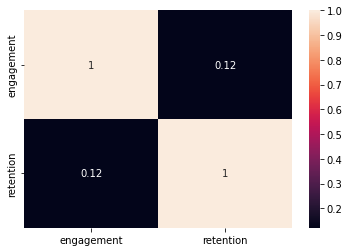

In [ ]:
import seaborn as sns
sns.heatmap(data=df.corr(),annot=True)